# E9 241 Digital Image Processing - Assignment 3
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

In [44]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from skimage.util import img_as_float

from src.P01_Directional_Filtering import *
from src.P02_Gaussian_Blurring_Inverse_Filtering import *

## Problem 1: Directional Filtering

### Problem 1.(a)

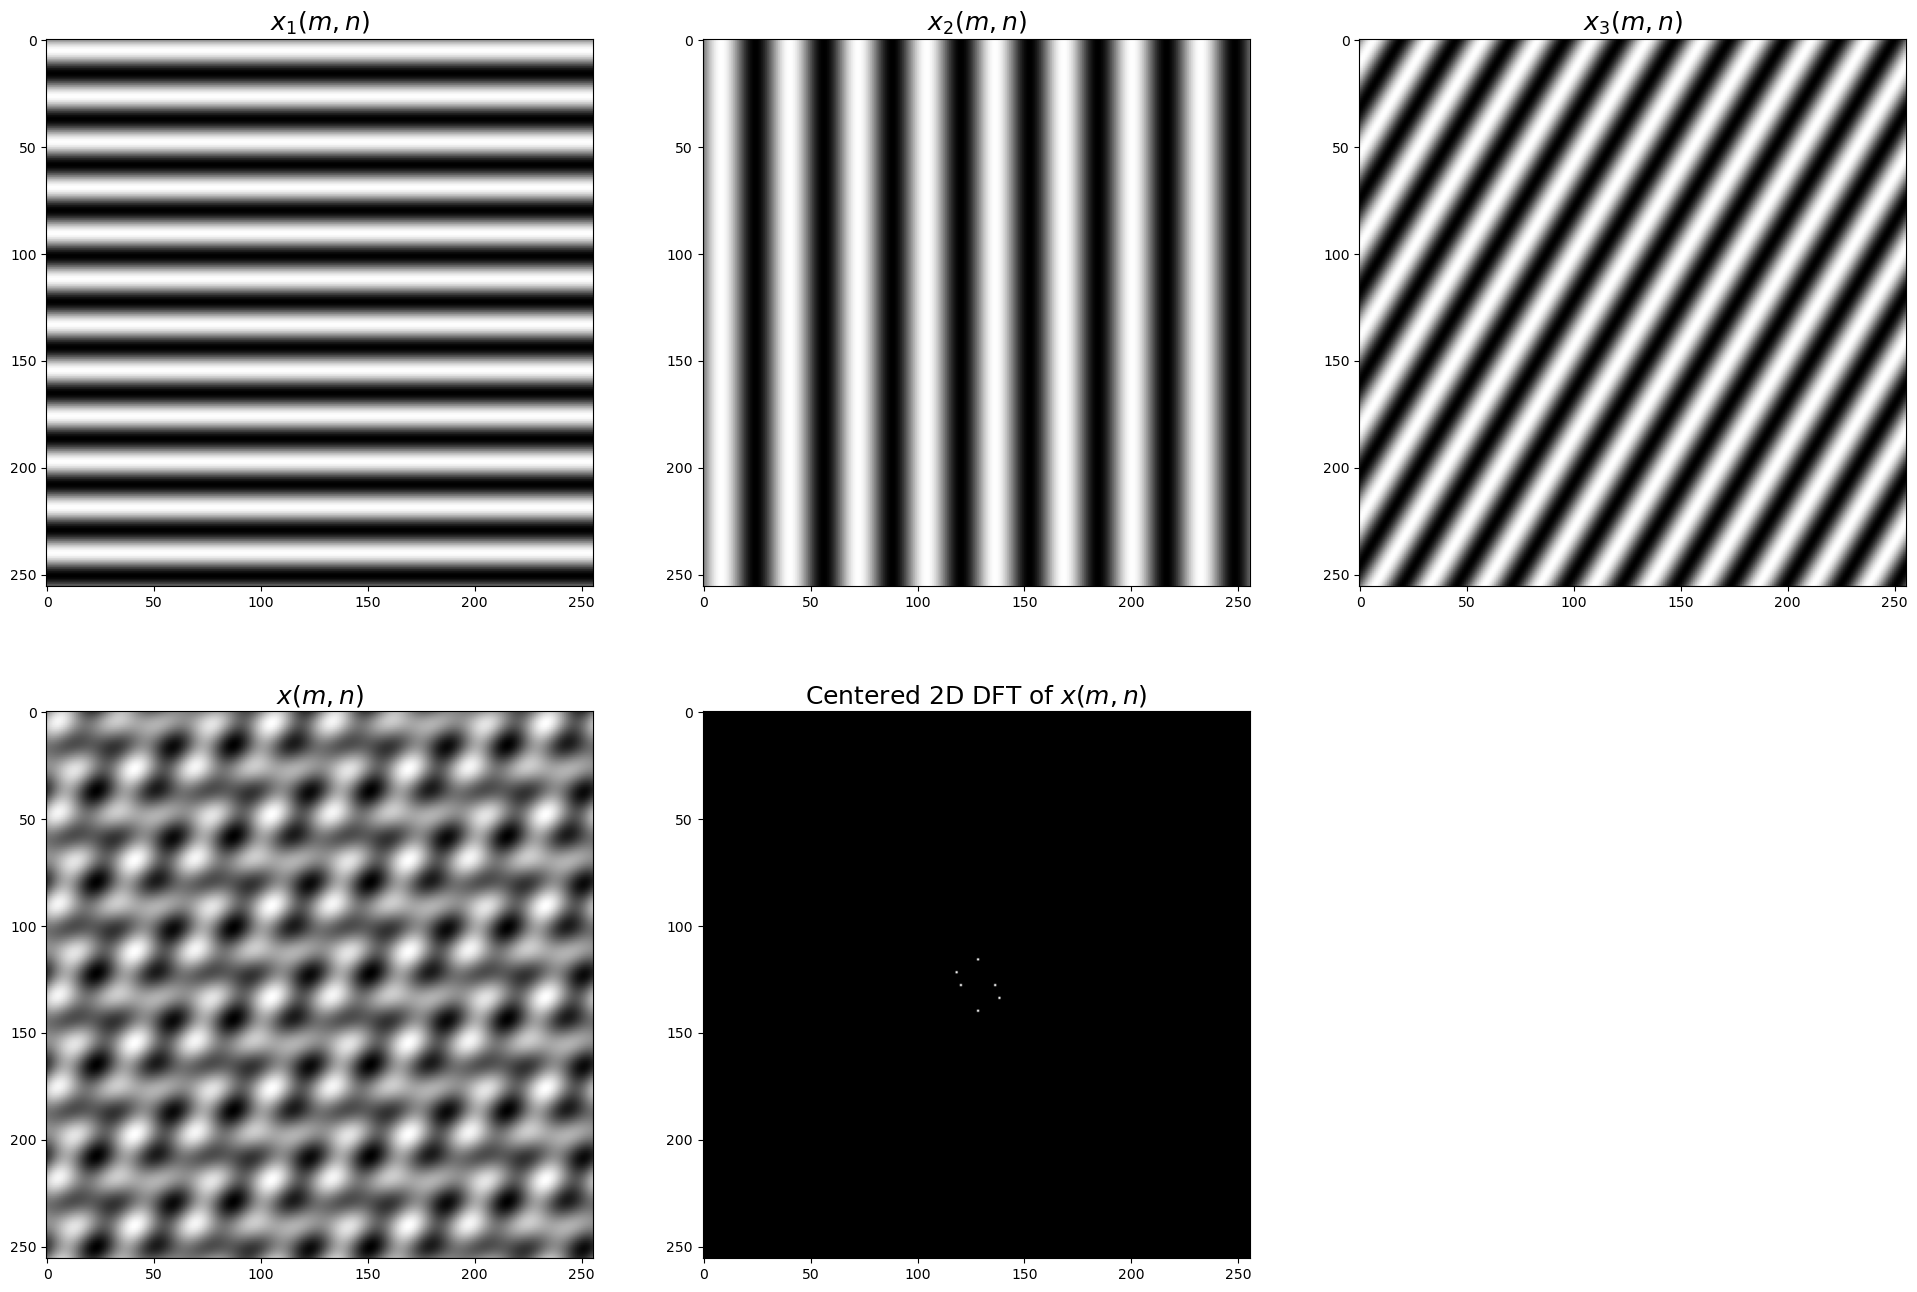

In [40]:
vertical_image = vertical_sin(256)
horizontal_image = horizontal_sin(256)
diagonal_image = diagonal_sin(256)

combined_image = (vertical_image+horizontal_image+diagonal_image)/3

fft_combined_image = fft2(combined_image)
fft_combined_image = fftshift(fft_combined_image)

plt.figure(figsize=(24, 16))
plt.subplot(2, 3, 1)
plt.title(r"$x_1(m,n)$", fontsize=18)
plt.imshow(vertical_image, cmap='gray')
plt.subplot(2, 3, 2)
plt.title(r"$x_2(m,n)$", fontsize=18)
plt.imshow(horizontal_image, cmap='gray')
plt.subplot(2, 3, 3)
plt.title(r"$x_3(m,n)$", fontsize=18)
plt.imshow(diagonal_image, cmap='gray')
plt.subplot(2, 3, 4)
plt.title(r"$x(m,n)$", fontsize=18)
plt.imshow(combined_image, cmap='gray')
plt.subplot(2, 3, 5)
plt.title(r"Centered 2D DFT of $x(m,n)$", fontsize=18)
plt.imshow(np.abs(fft_combined_image), cmap='gray')
plt.subplot(2, 3, 6).axis('off')
plt.show()

### Problem 1.(b)

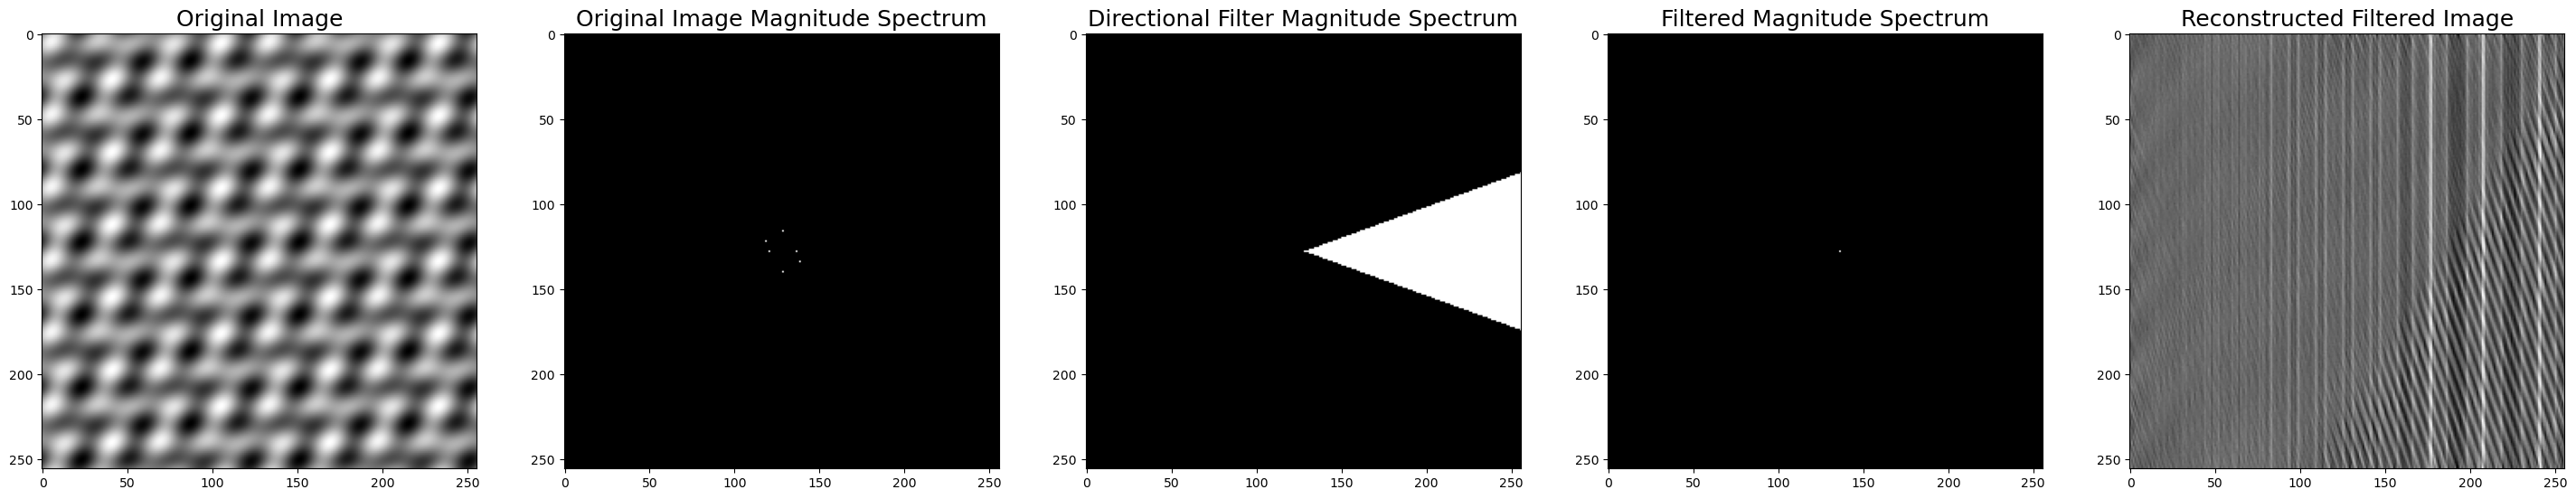

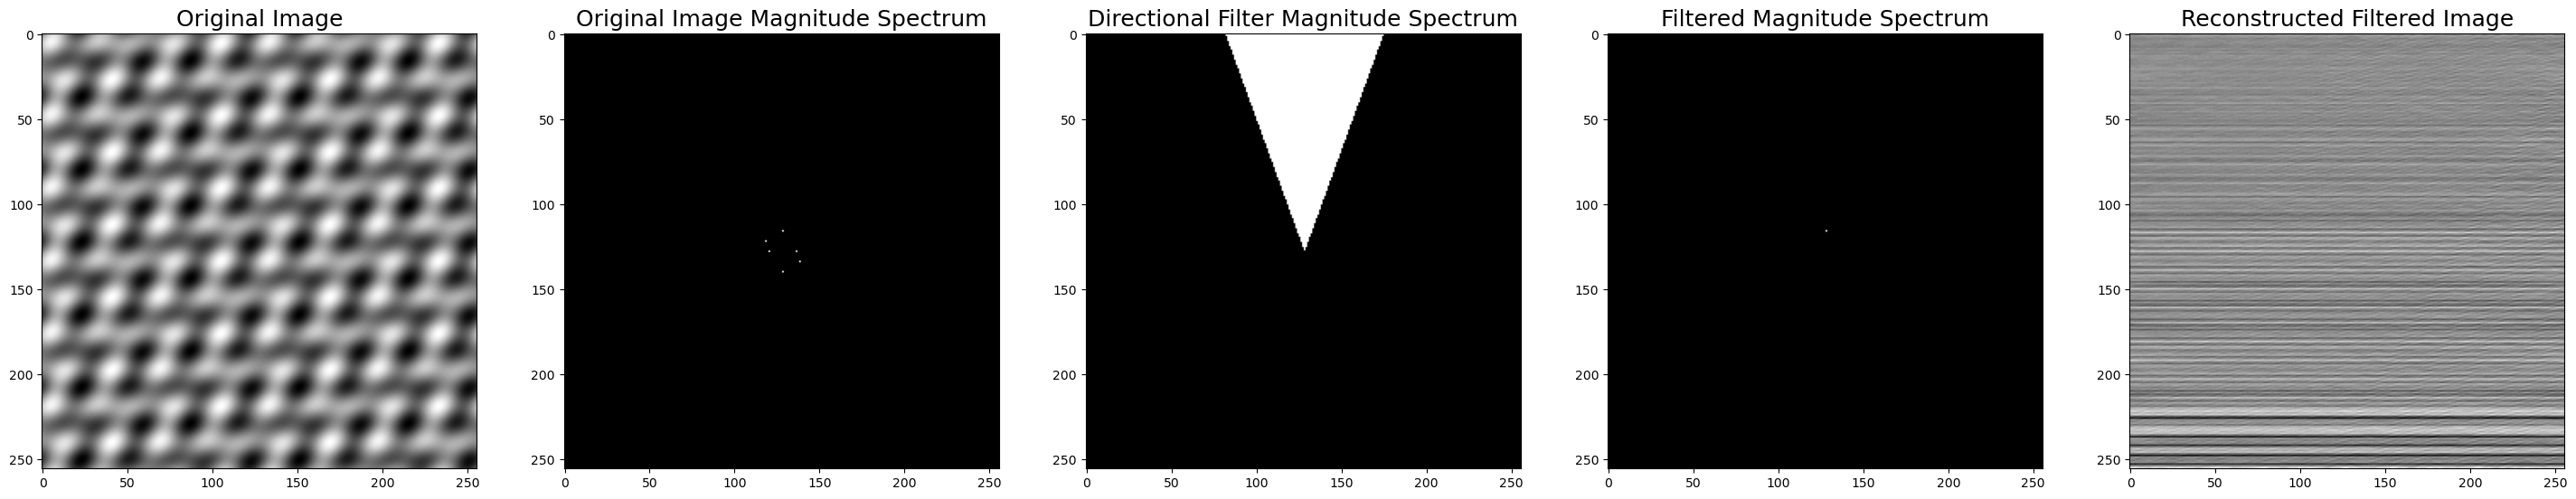

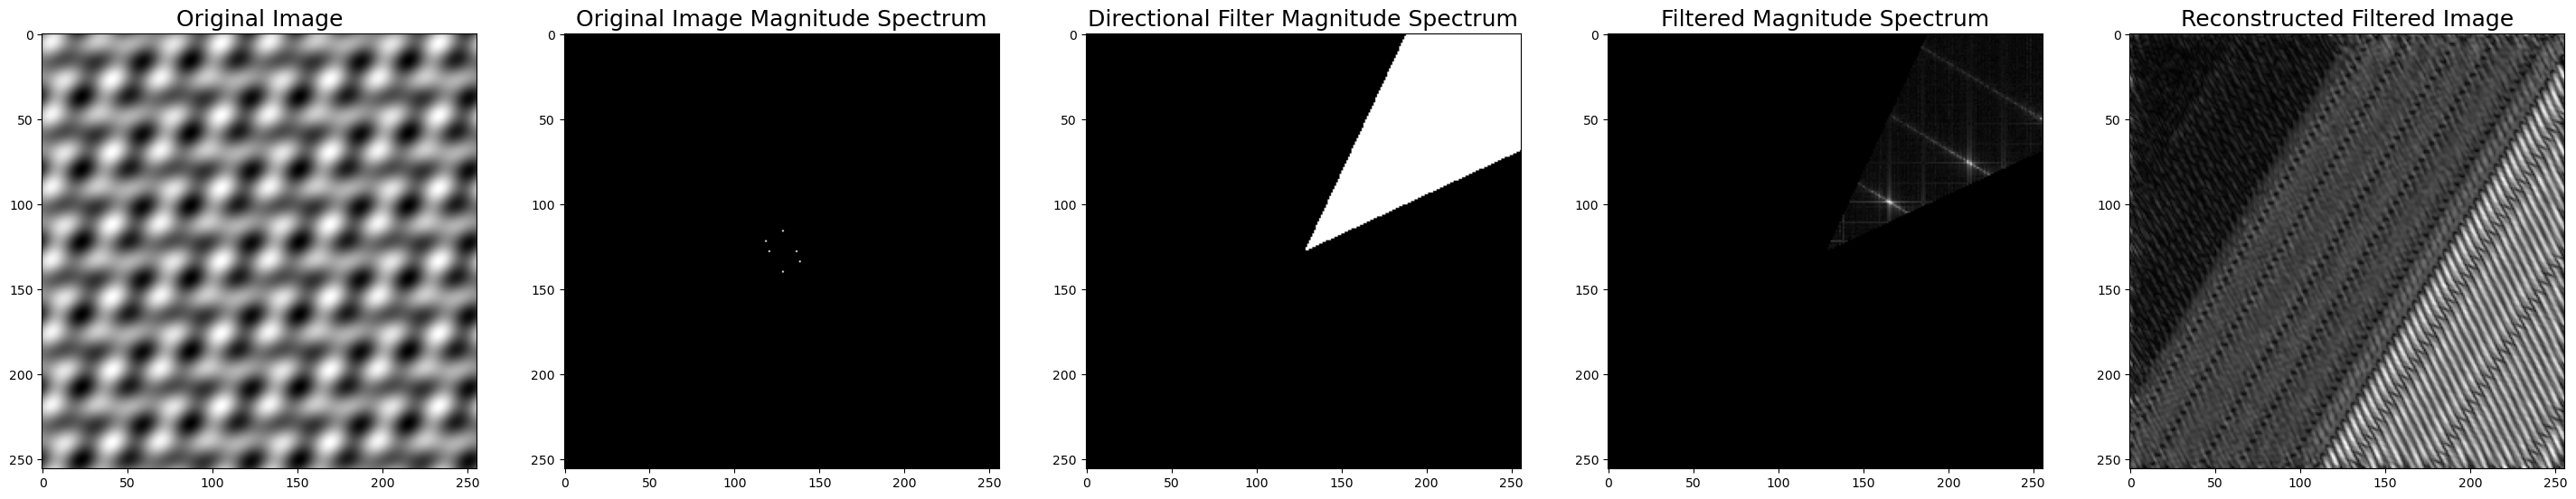

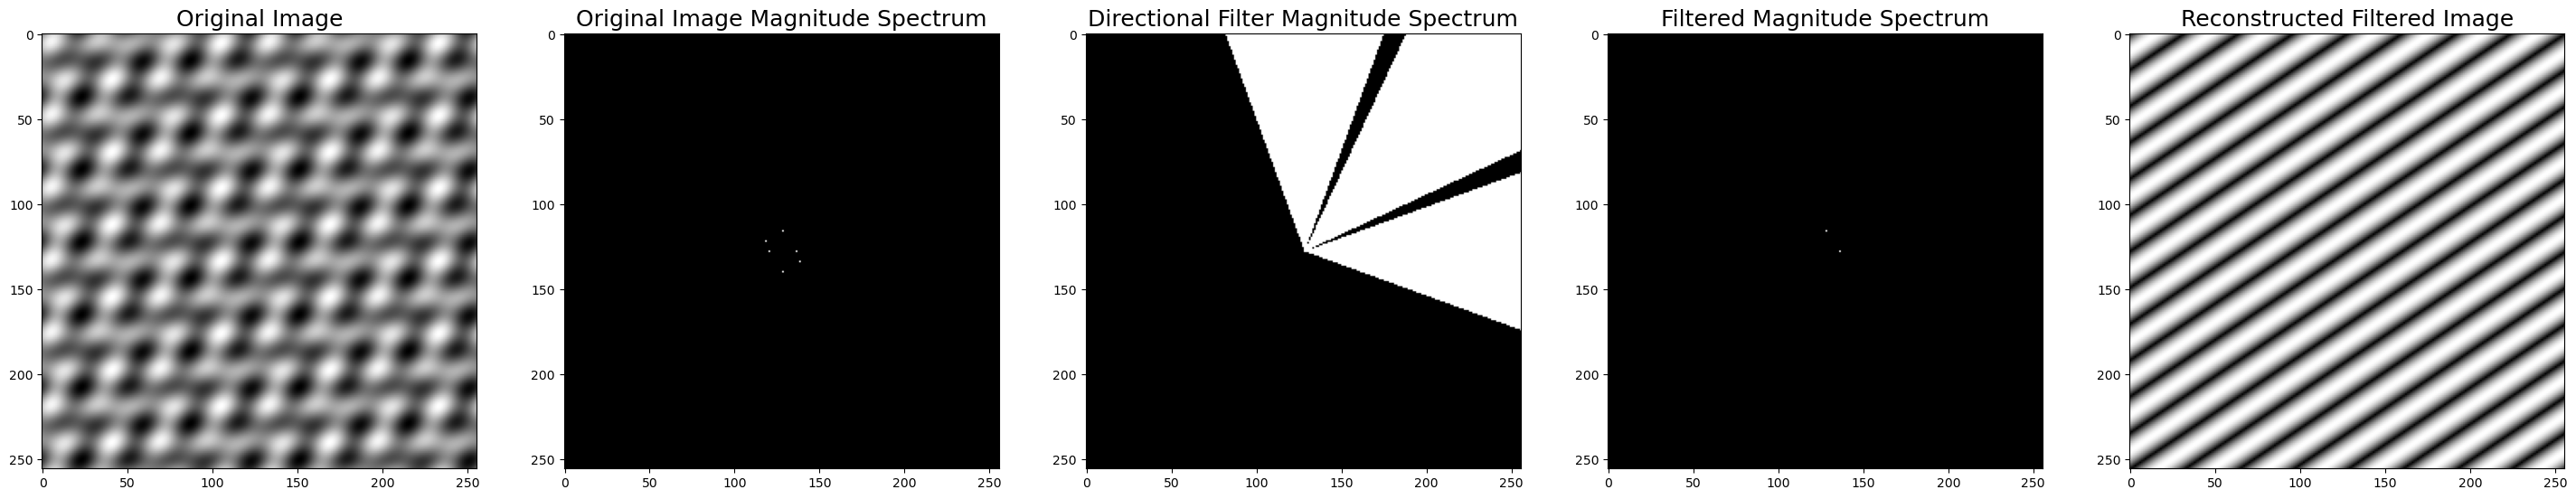

In [41]:
H_1 = directional_filter(fft_combined_image, -20,20)
H_2 = directional_filter(fft_combined_image, 70,110)
H_3 = directional_filter(fft_combined_image, 25,65)
H_4 = np.maximum(H_1, np.maximum(H_2,H_3))


for i in [H_1,H_2,H_3,H_4]:
    filtered_image_frequency = fft_combined_image*i
    filtered_image_frequency_shift = ifftshift(filtered_image_frequency)
    filtered_image = ifft2(filtered_image_frequency_shift)
    plt.figure(figsize=(36,28))
    plt.subplot(1,5,1)
    plt.title("Original Image", fontsize = 18)
    plt.imshow(combined_image, cmap='gray')
    plt.subplot(1,5,2)
    plt.title("Original Image Magnitude Spectrum", fontsize = 18)
    plt.imshow(np.log1p(np.abs(fft_combined_image)**0.5), cmap='gray')
    plt.subplot(1,5,3)
    plt.title("Directional Filter Magnitude Spectrum", fontsize = 18)
    plt.imshow(np.log1p(np.abs(i)**0.5), cmap = 'gray')
    plt.subplot(1,5,4)
    plt.title("Filtered Magnitude Spectrum", fontsize = 18)
    plt.imshow(np.log1p(np.abs(filtered_image_frequency)**0.5), cmap = 'gray')
    plt.subplot(1,5,5)
    plt.title("Reconstructed Filtered Image", fontsize = 18)
    plt.imshow(np.abs(filtered_image), cmap = 'gray')
    plt.show()
    

### Problem 1.(c)

In [4]:
for i in [H_1,H_2,H_3,H_4]:
    filtered_image_frequency = fft_combined_image*i
    filtered_image_frequency_shift = ifftshift(filtered_image_frequency)
    filtered_image = ifft2(filtered_image_frequency_shift)
    print("The MSE for this filter is", mse(combined_image,filtered_image))


The MSE for this filter is 0.1388888888888889
The MSE for this filter is 0.13888888888888887
The MSE for this filter is 0.1666666666666667
The MSE for this filter is 0.11111111111111113


## Problem 2: Gaussian Blurring and Inverse Filtering

### Problem 2.(a)

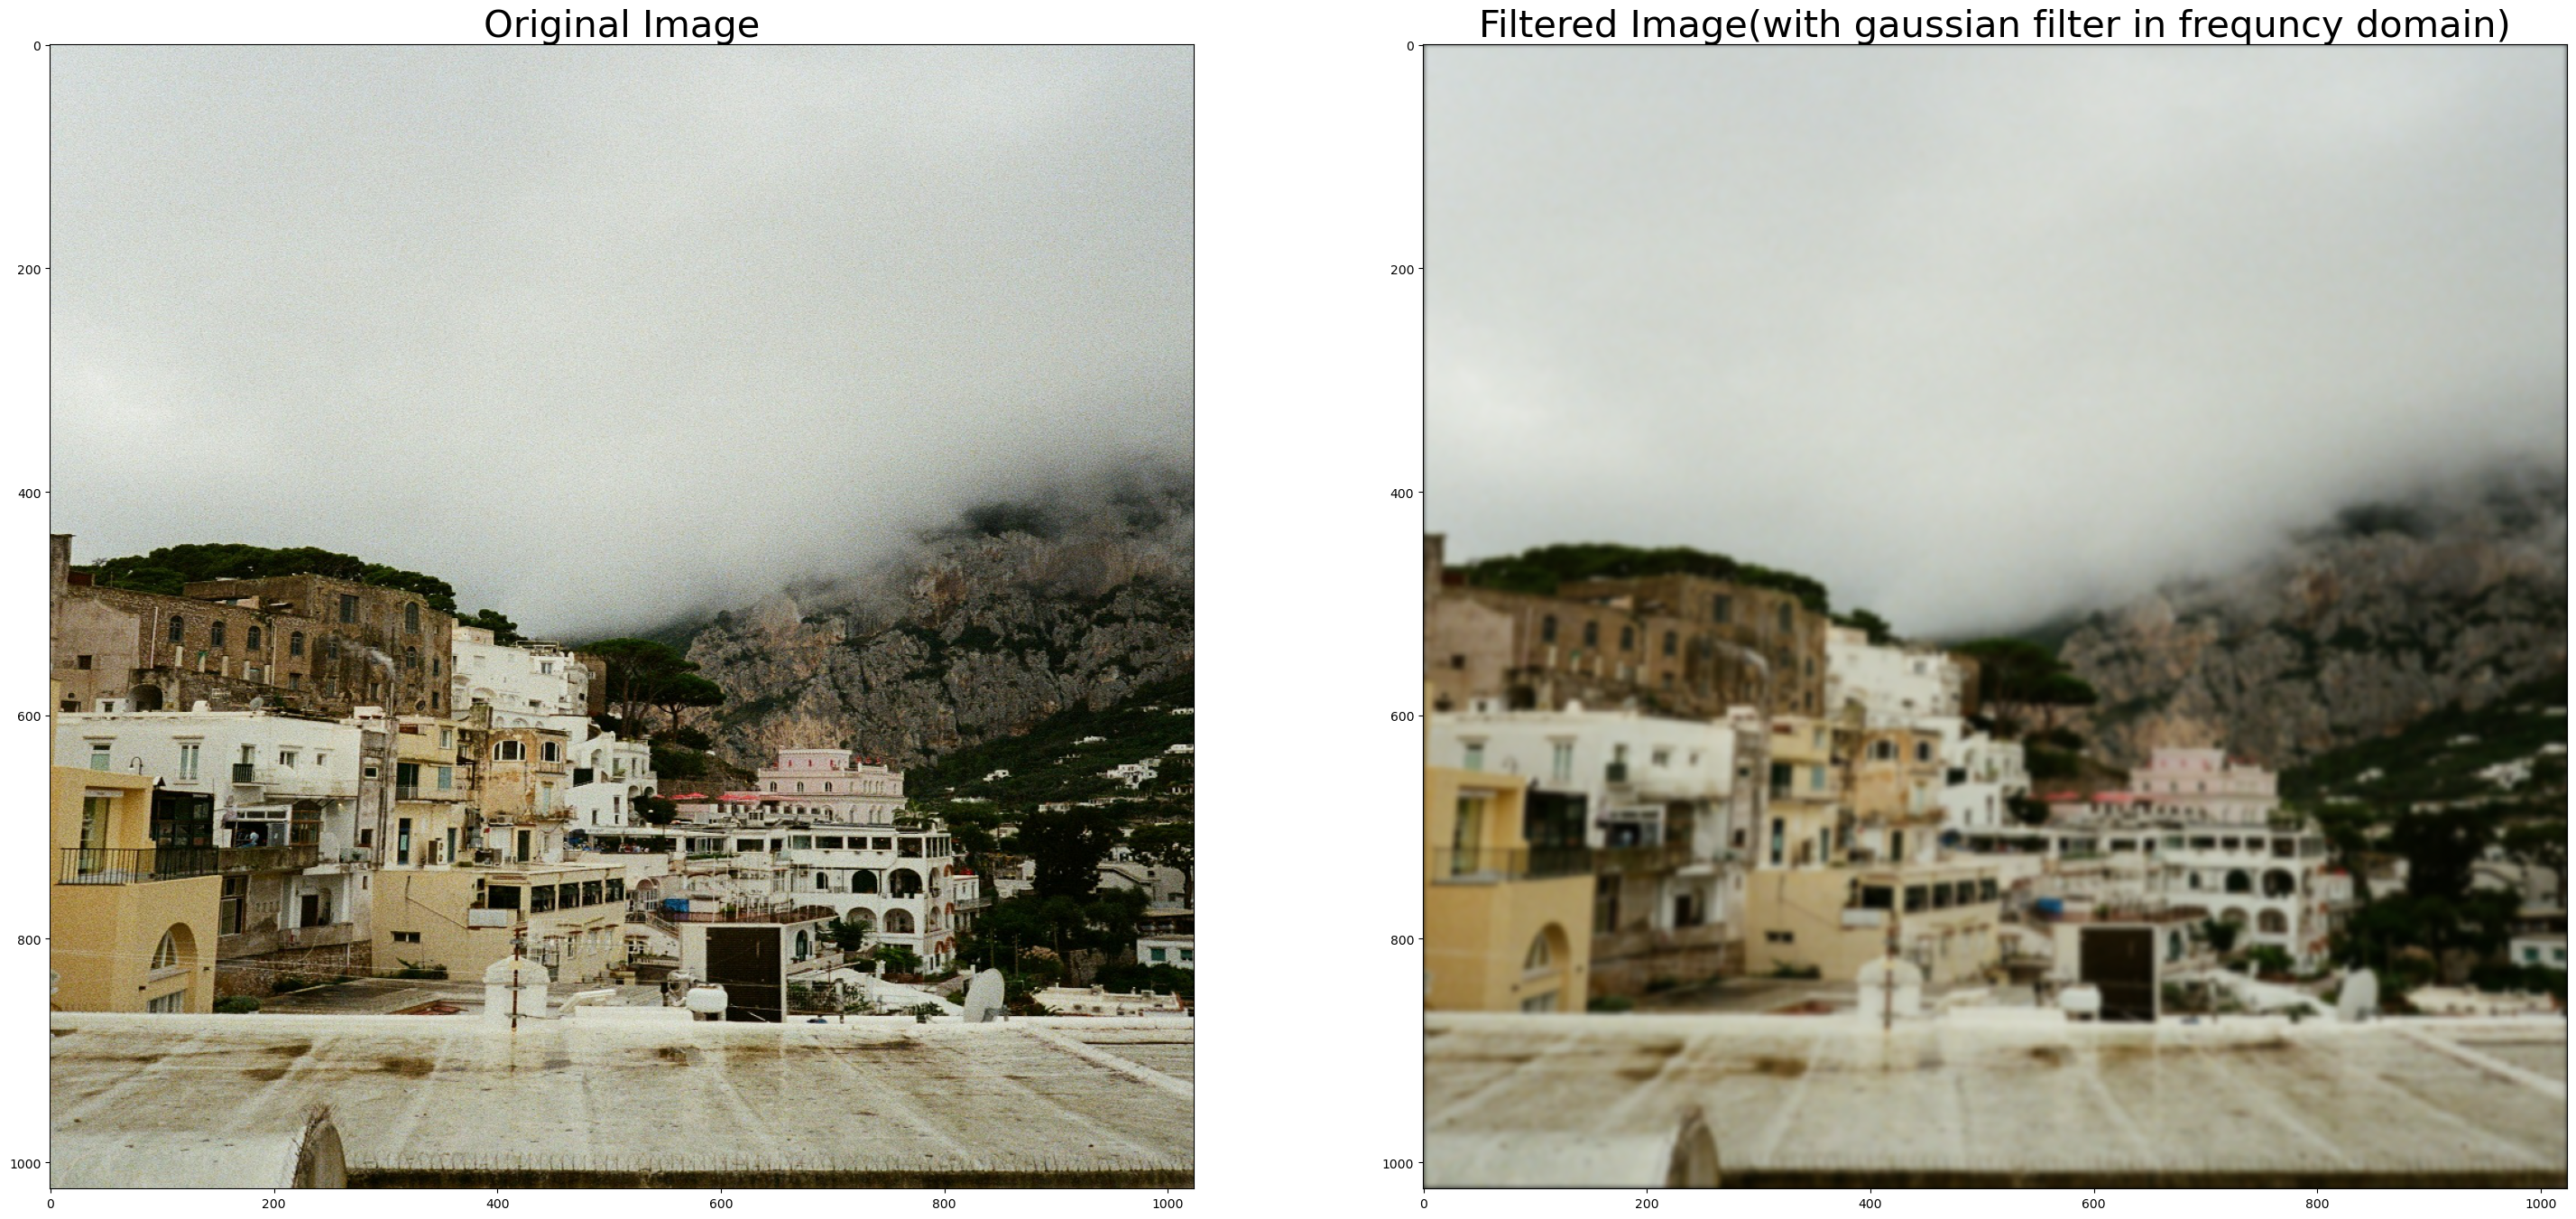

In [52]:
building_img = img_as_float(skimage.io.imread('images/buildings.jpg'))

G_kernel_td = gaussian_filter_tf()

padding_width = (building_img.shape[0])//2
padding_width_img = (G_kernel_td.shape[0])//2
G_kernel_td_padded = np.pad(G_kernel_td, ((padding_width,padding_width-1),(padding_width,padding_width-1)))
G_kernel_td_padded = ifftshift(G_kernel_td_padded)
G_kernel_fd = fft2(G_kernel_td_padded)

building_img_filtered = np.zeros_like(building_img)

for i in range(3):
    building_img_padded = np.pad(building_img[:,:,i],((padding_width_img,padding_width_img),(padding_width_img,padding_width_img)))
    building_img_fd = fft2(building_img_padded)
    building_filtered_img = building_img_fd*G_kernel_fd
    building_img_filtered[:,:,i] = np.real(ifft2(building_filtered_img))[padding_width_img:(building_filtered_img.shape[0]-padding_width_img),padding_width_img:(building_filtered_img.shape[0]-padding_width_img)]


plt.figure(figsize=(36,30))
plt.subplot(1,2,1)
plt.title("Original Image",fontsize = 30)
plt.imshow(building_img)
plt.subplot(1,2,2)
plt.title("Filtered Image(with gaussian filter in frequncy domain)", fontsize = 30)
plt.imshow(building_img_filtered)
plt.show()


### Problem 2.(b)

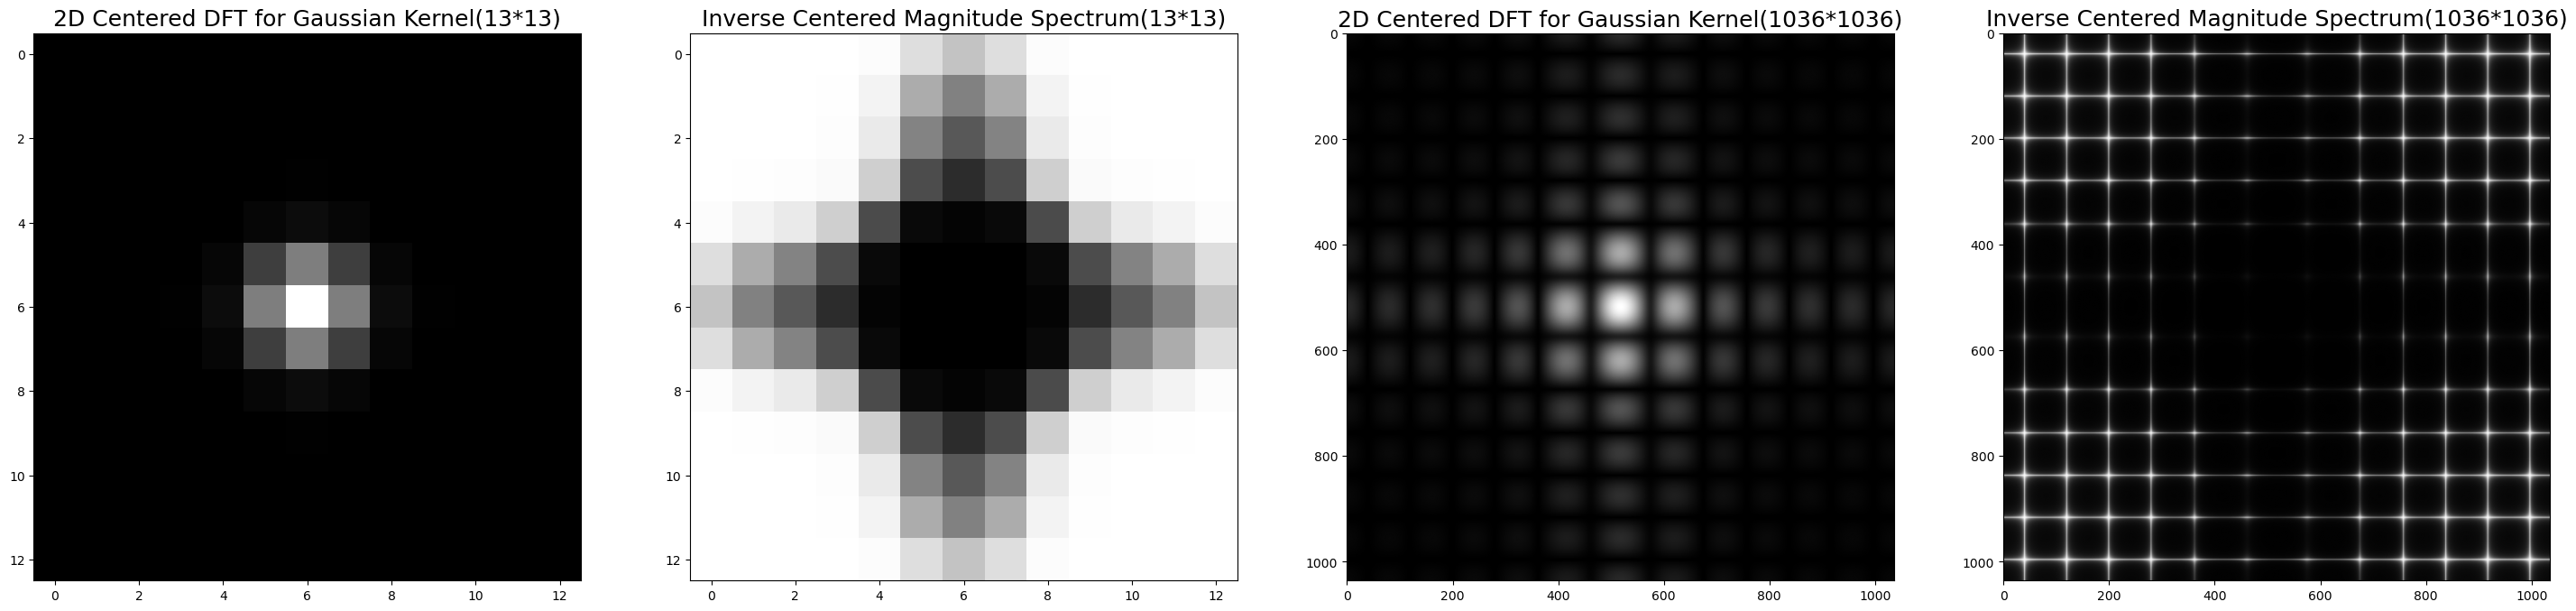

In [59]:
G_kernel_td = gaussian_filter_tf() 
G_kernel_td = ifftshift(G_kernel_td)
G_kernel_fd = fftshift(fft2(G_kernel_td)) #2.(b).(i)
G_kernel_fd_inverse = 1/(np.abs(G_kernel_fd)+ 1e-3) #2.(b).(ii)

padding_width = (building_img.shape[0])//2
G_kernel_td_padded = np.pad(G_kernel_td, ((padding_width,padding_width-1),(padding_width,padding_width-1)))
G_kernel_td_padded = ifftshift(G_kernel_td_padded)
G_kernel_fd_padded = fftshift(fft2(G_kernel_td_padded)) #2.(b).(iii)
G_kernel_fd_padded_inverse = 1/(np.abs(G_kernel_fd_padded)+ 1e-3) #2.(b).(iv)

plt.figure(figsize=(36,30))
plt.subplot(1,4,1)
plt.title("2D Centered DFT for Gaussian Kernel(13*13)", fontsize = 18)
plt.imshow(np.abs(G_kernel_fd), cmap = 'gray')
plt.subplot(1,4,2)
plt.title("Inverse Centered Magnitude Spectrum(13*13)", fontsize = 18)
plt.imshow(G_kernel_fd_inverse, cmap = 'gray')
plt.subplot(1,4,3)
plt.title("2D Centered DFT for Gaussian Kernel(1036*1036)", fontsize = 18)
plt.imshow(np.abs(G_kernel_fd_padded), cmap = 'gray')
plt.subplot(1,4,4)
plt.title("Inverse Centered Magnitude Spectrum(1036*1036)", fontsize = 18)
plt.imshow(G_kernel_fd_padded_inverse, cmap = 'gray')
plt.show()

### Problem 2.(c): Gaussian Frequency Response Fit